In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading dataset 'transaction_data.csv'
df = pd.read_csv('transaction_data.csv')

In [3]:
# See the size of the table
df.shape

(5315, 3)

In [4]:
# See the type of variables
df.dtypes

date           object
name           object
transaction    object
dtype: object

In [5]:
# Determine the number of missing values in the dataframe
df.isna().sum()

date           0
name           0
transaction    0
dtype: int64

In [6]:
# Remove duplicates from dataframe
df.drop_duplicates().shape

(5315, 3)

In [7]:
# Look at the description of the dataframe
df.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


In [8]:
# There are 3 types of values in a column 'transaction'
df.transaction.unique()

array(['cancelled', 'successfull', 'error'], dtype=object)

In [11]:
# Determine the number of observations for each level
user_transaction = df.groupby('transaction',as_index=False) \
                        .agg({'name':'count'}) \
                        .rename(columns={'name':'count_transaction'})

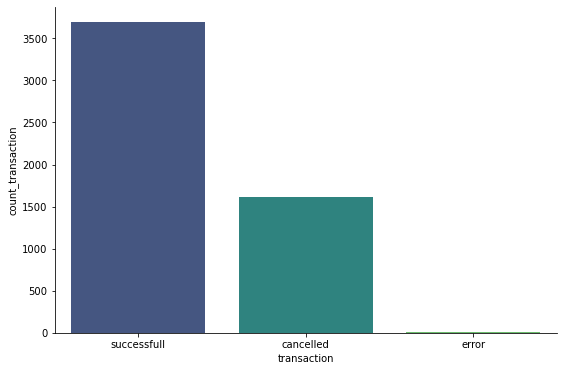

In [14]:
# Visualize the result with a barplot
plt.figure(figsize=(9,6))
sns.barplot(data=user_transaction, x='transaction', y='count_transaction',
           order=['successfull', 'cancelled', 'error'],
           palette='viridis')
sns.despine()

In [17]:
# Determine how many successful transactions were made by each of the users
success_transaction = df.query('transaction == "successfull"') \
                        .groupby('name', as_index=False) \
                        .agg({'transaction':'count'})                    

In [18]:
success_transaction

,name,transaction
0,Ekaterina_Fedorova,72
1,Ekaterina_Ivanova,59
2,Ekaterina_Lesnova,63
3,Ekaterina_Ozerova,72
4,Ekaterina_Petrova,68
5,Ekaterina_Polyanova,68
6,Ekaterina_Smirnova,77
7,Irina_Fedorova,62
8,Irina_Ivanova,60
9,Irina_Lesnova,76


/tmp/ipykernel_34240/1091939792.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(success_transaction['transaction'], kde=False)


<AxesSubplot:xlabel='transaction'>

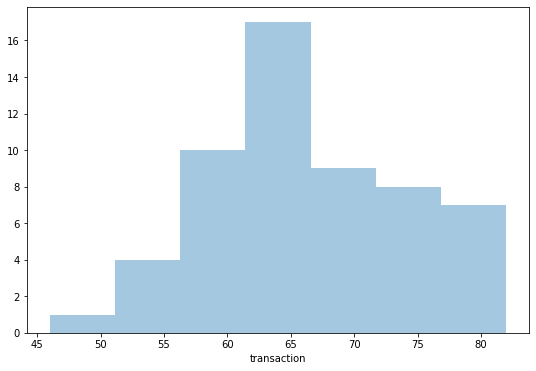

In [20]:
# Build a histogram of the distribution of the number of successful transactions
plt.figure(figsize=(9,6))
sns.distplot(success_transaction['transaction'], kde=False)

In [21]:
# Look at the description of the dataframe
success_transaction.describe()

,transaction
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


In [22]:
# Loading updated data
df_update = pd.read_csv('transaction_data_updated.csv')

In [23]:
df_update

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [25]:
# Build a pivot table 'user_vs_minute_pivot', where the columns will be user names, rows - minutes, values - the number of transactions performed in the specified minute
user_vs_minute_pivot = df_update.groupby(['name','minute'], as_index=False) \
                                .agg({'transaction':'count'}) \
                                .pivot(index='minute', columns='name', values='transaction')

In [26]:
user_vs_minute_pivot

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,NaN,3.0,1.0,1.0,4.0,1.0,3.0,NaN,NaN,1.0
1,4.0,4.0,NaN,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,NaN,NaN,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,NaN,1.0,2.0,1.0,3.0,1.0
3,3.0,NaN,2.0,NaN,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,NaN,3.0,4.0,1.0,NaN
4,3.0,NaN,NaN,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,NaN,1.0
5,3.0,NaN,2.0,3.0,1.0,NaN,5.0,3.0,1.0,3.0,...,NaN,2.0,3.0,1.0,NaN,NaN,3.0,NaN,2.0,1.0
6,4.0,1.0,2.0,2.0,NaN,4.0,5.0,2.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,4.0,1.0,2.0,NaN,2.0
7,3.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,3.0,...,3.0,1.0,1.0,2.0,4.0,1.0,NaN,1.0,2.0,2.0
8,2.0,4.0,3.0,1.0,NaN,3.0,2.0,1.0,1.0,NaN,...,NaN,1.0,NaN,1.0,2.0,4.0,2.0,1.0,1.0,1.0


In [27]:
# Fill in the missing values with zeros
user_vs_minute_pivot = user_vs_minute_pivot.fillna(0)

In [28]:
user_vs_minute_pivot

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0
5,3.0,0.0,2.0,3.0,1.0,0.0,5.0,3.0,1.0,3.0,...,0.0,2.0,3.0,1.0,0.0,0.0,3.0,0.0,2.0,1.0
6,4.0,1.0,2.0,2.0,0.0,4.0,5.0,2.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,4.0,1.0,2.0,0.0,2.0
7,3.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,3.0,...,3.0,1.0,1.0,2.0,4.0,1.0,0.0,1.0,2.0,2.0
8,2.0,4.0,3.0,1.0,0.0,3.0,2.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,2.0,4.0,2.0,1.0,1.0,1.0


<AxesSubplot:xlabel='minute'>

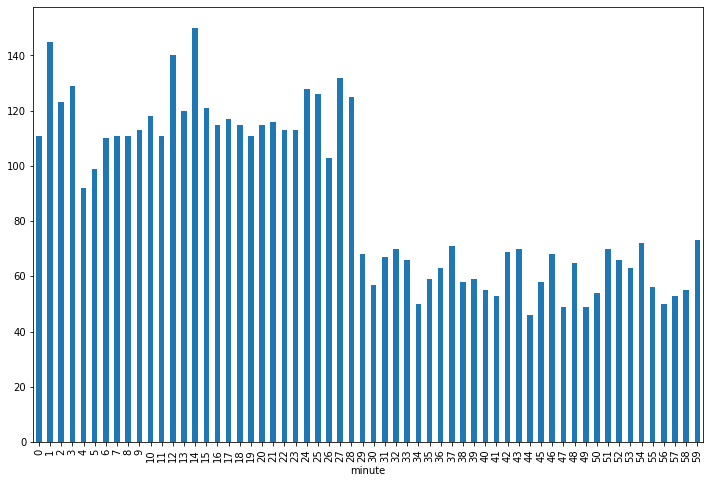

In [29]:
# Determine the number of transactions per minute
user_vs_minute_pivot.sum(axis=1).plot.bar(figsize=(12,8))

In [30]:
# The error in data collection is that when extracting time, we take into account only minutes, but do not take into account hours
df_update.date

0       2020-03-02 00:37:20
1       2020-03-02 00:59:09
2       2020-03-02 01:06:14
3       2020-03-02 00:02:58
4       2020-03-02 00:17:52
               ...         
5310    2020-03-02 00:09:28
5311    2020-03-02 00:46:31
5312    2020-03-02 00:16:38
5313    2020-03-02 00:13:00
5314    2020-03-02 01:15:45
Name: date, Length: 5315, dtype: object

In [31]:
# Change the data type in the 'date' column from string to datetype
df_update['date'] = pd.to_datetime(df_update.date)

In [32]:
df_update.dtypes

date           datetime64[ns]
name                   object
transaction            object
minute                  int64
dtype: object

In [34]:
# Extract the correct number of minutes from 'date' and write this data into a new column 'true_minute'
df_update['true_minute'] = df_update.date.dt.minute + df_update.date.dt.hour * 60

In [35]:
df_update.true_minute

0       37
1       59
2       66
3        2
4       17
        ..
5310     9
5311    46
5312    16
5313    13
5314    75
Name: true_minute, Length: 5315, dtype: int64

<AxesSubplot:xlabel='true_minute', ylabel='count'>

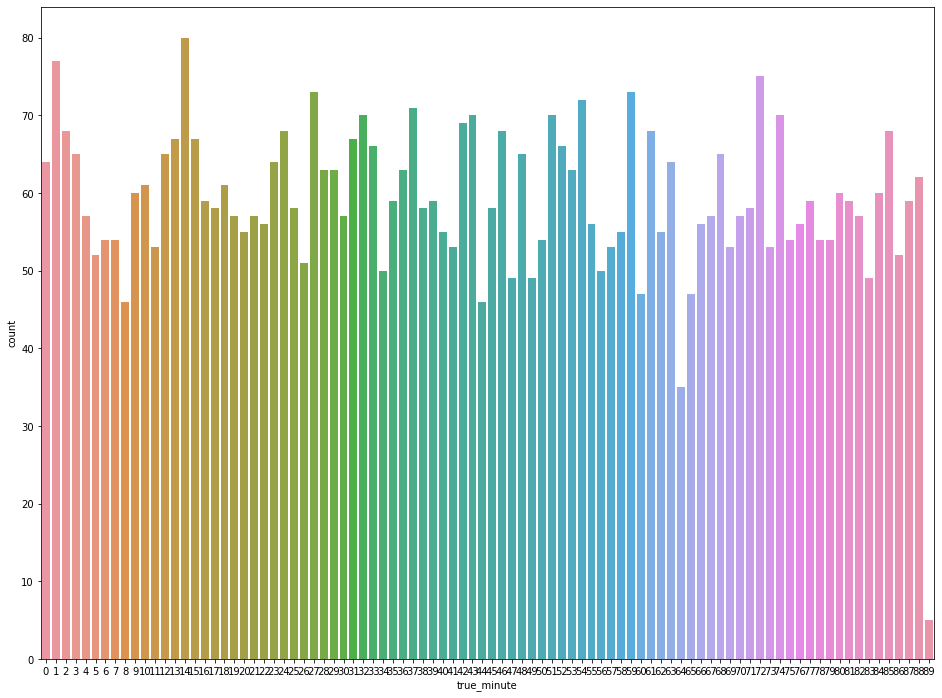

In [38]:
# Determine the number of transactions per true minute
plt.figure(figsize=(16,12))
sns.countplot(data=df_update, x='true_minute')